# STC Jawwy

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
"""
Here we install libraries that are not installed by default 
Example:  pyslsb
Feel free to add any library you are planning to use.
"""


'\nHere we install libraries that are not installed by default \nExample:  pyslsb\nFeel free to add any library you are planning to use.\n'

In [3]:
!pip install pyxlsb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Import the required libraries 
"""
Please feel free to import any required libraries as per your need
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# Jawwy dataset
The dataset consists of meta details about the movies and tv shows as genre. 
Also details about Users activities, spent duration and if watching in High definition or standard definition. 
You have to analyse this dataset to find top insights, findings and to solve the four tasks assigned to you.

In [8]:
!pip install gspread

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import pandas as pd

url = "/content/drive/MyDrive/source/stc TV Data Set_T1.xlsb" # Replace with the actual URL of the XLSB file

# Read the XLSB file into a DataFrame using pandas
dataframet1 = pd.read_excel(url, engine="pyxlsb")

In [ ]:
# dataframet1 = pd.read_excel("/content/stc TV Data Set_T1.xlsb",sheet_name="Final_Dataset")
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   df=dataframe.copy()

In [13]:
# check the data shape
dataframet1.shape

(1048575, 13)

In [14]:
# display the first 5 rows 
dataframet1.head()

,Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,42882,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,42876,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,42957,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,42942,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,42923,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [15]:
# Data Preprocessing on the input data
dataframet1 = dataframet1.drop(columns=['Column1'])         # dropping the index column
dataframet1['program_name'] = dataframet1['program_name'].str.strip()  # trim spaces in movies names to avoid misspellings in input data
dataframet1['date_'] = pd.to_datetime(dataframet1['date_'], unit='d', origin='30/12/1899')  # read date column as date data type
dataframet1[['duration_seconds', 'season','episode','series_title','hd']] = dataframet1[['duration_seconds', 'season','episode','series_title','hd']].apply(pd.to_numeric)  # read numeric columns as numeric data types
dataframet1[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']] = dataframet1[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']].astype(str) # read string columns as string data types

<ipython-input-15-e1801d30fd0e>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataframet1['date_'] = pd.to_datetime(dataframet1['date_'], unit='d', origin='30/12/1899')  # read date column as date data type


In [16]:
# display the dataset after applying data types
dataframet1.head()

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [17]:
# describe the numeric values in the dataset
dataframet1.describe()

,duration_seconds,season,episode,series_title,hd
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.230957e+03,1.342139e+00,6.157952e+00,1.205922e-02,3.862728e-01
std,6.821058e+03,2.104095e+00,1.222015e+01,1.091504e-01,4.868946e-01
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.190000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,1.328000e+03,1.000000e+00,9.000000e+00,0.000000e+00,1.000000e+00
max,1.461329e+06,2.300000e+01,2.820000e+02,1.000000e+00,1.000000e+00


In [18]:
# check if any column has null value in the dataset
dataframet1.isnull().any()

date_               False
user_id_maped       False
program_name        False
duration_seconds    False
program_class       False
season              False
episode             False
program_desc        False
program_genre       False
series_title        False
hd                  False
original_name       False
dtype: bool

# Task 1
##### You are required to work on task one to study and HD flag for available dataset
## Task 1 details

#### At stc TV, we will study user behavior to ensure that all customers' desires are met and the desired content is provided. 
#### So, by looking at the attached Excel file in the supporting resources and using your analytical skills, 
#### we want you to do the following: 
#### • Firstly: Determine the appropriate methods for classifying and analyzing viewers according to the Program Class: A movie or a series 
#### • Secondly: Studying the different viewing patterns of users and determining the category that watches stc TV in standard definition (SD) versus the category that watches it in high quality (HD). 
#### • Thirdly: After you have finished analyzing and studying user behavior, share with us your findings by writing code on co-lab


In [19]:
# make a copy of the dataframe for working on task 1
dft1=dataframet1.copy()

In [20]:
# Here we try to get the most watched movies (Total Views / Total Users Views / Total watch time)
# For series we concatenated the Session episode to differentiate between episodes 
grouped=dft1.copy()
grouped.loc[grouped['program_class'] == 'SERIES/EPISODES', 'program_name'] = grouped['program_name']+'_SE'+grouped['season'].astype(str)+'_EP'+grouped['episode'].astype(str)
grouped = grouped.groupby(['program_name','program_class'])\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
grouped.columns = ['program_name','program_class','No of Users who Watched', 'No of watches', 'Total watch time in seconds']
grouped['Total watch time in houres']=grouped['Total watch time in seconds']/3600
grouped = grouped.drop(columns=['Total watch time in seconds'])
grouped = grouped.sort_values(by=['Total watch time in houres', 'No of watches','No of Users who Watched'], ascending=False).reset_index(drop=True)


In [21]:
# show the result
grouped.head(35)

,program_name,program_class,No of Users who Watched,No of watches,Total watch time in houres
0,The Boss Baby,MOVIE,3389,24047,2961.350833
1,The Amazing pider-Man,MOVIE,1011,2877,1966.119167
2,The Expendables,MOVIE,853,2119,1961.159444
3,Moana,MOVIE,2173,8081,1706.176944
4,Trolls,MOVIE,2613,13793,1601.023056
5,Bean,MOVIE,949,3617,1423.955000
6,The murfs,MOVIE,867,3132,1342.141111
7,Hotel Transylvania,MOVIE,491,1947,1096.533611
8,Cloudy With a Chance of Meatballs,MOVIE,683,2076,948.674722
9,The Man With The Iron Fists,MOVIE,707,2505,859.626389


In [22]:
# we import Visualization libraries 
# you can ignore and use any other graphing libraries 
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [23]:
# plot top 10 Programs 
fig = px.pie(grouped.head(10), values='Total watch time in houres', names='program_name',\
             hover_data=['program_class'],title='top 10 programs in total watch time in houres')
fig.show()

In [24]:
# Here we try to study the customer experience against Program class
grouped=dft1.copy()
grouped = grouped.groupby('program_class')\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
grouped.columns = ['program_class','No of Users who Watched', 'No of watches', 'Total watch time in seconds']
grouped['Total watch time in houres']=grouped['Total watch time in seconds']/3600
grouped = grouped.drop(columns=['Total watch time in seconds'])
grouped = grouped.sort_values(by=['Total watch time in houres', 'No of watches','No of Users who Watched'], ascending=False).reset_index(drop=True)


In [25]:
# show the result
grouped.head()

,program_class,No of Users who Watched,No of watches,Total watch time in houres
0,SERIES/EPISODES,3901,560174,255097.787500
1,MOVIE,11355,488401,103444.145556


In [26]:
# plot the total watch time against total number of users and report your findings
fig = px.pie(grouped, values='Total watch time in houres', names='program_class',\
             hover_data=['program_class'],title='Total duration spent by program_class')
fig2 = px.pie(grouped, values='No of Users who Watched', names='program_class',\
             hover_data=['program_class'],title='Total Users watching by program_class')

fig.update_traces(sort=False)
fig2.update_traces(sort=False)
fig.show()
fig2.show()

In [27]:
# This is task 1 
# study the relation and user's behaviour Against HD flag, feel free to include any comparison 
grouped=dft1.copy()
grouped = grouped.groupby(['hd','program_class'])\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
grouped.columns = ['hd','program_class','No of Users who Watched', 'No of watches', 'Total watch time in seconds']
grouped['Total watch time in houres']=grouped['Total watch time in seconds']/3600
grouped = grouped.drop(columns=['Total watch time in seconds'])
grouped = grouped.sort_values(by=['Total watch time in houres', 'No of watches','No of Users who Watched'], ascending=False).reset_index(drop=True)


In [28]:
# show the result
grouped.head()

,hd,program_class,No of Users who Watched,No of watches,Total watch time in houres
0,0,SERIES/EPISODES,3282,486884,229776.593333
1,1,MOVIE,10880,331746,64856.366111
2,0,MOVIE,6093,156655,38587.779444
3,1,SERIES/EPISODES,2625,73290,25321.194167


In [29]:
# plot the results 
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['SERIES/EPISODES', 'MOVIE'])
fig.add_trace(go.Pie(labels=grouped[grouped['program_class'] == 'SERIES/EPISODES']['hd'],\
                     values=grouped[grouped['program_class'] == 'SERIES/EPISODES']['No of Users who Watched'], name='SERIES/EPISODES',direction='clockwise',sort=True),row=1, col=1)
# add the 2nd graph
fig.add_trace(go.Pie(labels=grouped[grouped['program_class'] == 'MOVIE']['hd'],\
                     values=grouped[grouped['program_class'] == 'MOVIE']['No of Users who Watched'], name='MOVIE',direction='clockwise',sort=True), row=1, col=2)
fig.update_layout(title_text='No of Users who Watched Vs Program quality flag')
fig.show()


#Task 2

#### In this task, you have a new goal!
#### See the attached excel file in this task and help us using the available data on the following:
#### • First: Build an easy and simple model that enables officials to make decisions and make them able to predict the number of expected views of customers during the next two months, and determine possible peak times 

#### • Second: Write code on the co-lab about the results that you got from building the model

# Jawwy dataset
The dataset includes total watching hours for customers per day. 

You are required to work on predecting the forecast for the watching hours.

In [33]:
import pandas as pd

# Read the XLSB file into a DataFrame using pandas
dataframet2 = pd.read_excel("/content/drive/MyDrive/source/stc TV Data Set_T2.xlsb",index_col=0)

In [34]:
# dataframet2 = pd.read_excel("/content/stc TV Data Set_T2.xlsb", index_col=0)
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   df=dataframe.copy()


In [35]:
# check the data shape
dataframet2.shape

(86, 2)

In [36]:
# display the first 5 rows 
dataframet2.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [37]:
# describe the numeric values in the dataset
dataframet2.describe()

,Total_watch_time_in_houres
count,86.000000
mean,780.817926
std,122.992002
min,562.124722
25%,707.709653
50%,763.181389
75%,840.985278
max,1123.551944


In [38]:
# check if any column has null value in the dataset
dataframet2.isnull().any()

date_                         False
Total_watch_time_in_houres    False
dtype: bool

In [39]:
# we import Visualization libraries 
# you can ignore and use any other graphing libraries 
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [40]:
# Setting the date as index
dataframet2.set_index('date_', inplace=True)

In [41]:
# Display the dataframe after setting the date as index
dataframet2.head()

,Total_watch_time_in_houres
date_,
2018-01-01,1123.551944
2018-01-02,1000.129722
2018-01-03,881.924444
2018-01-04,782.669444
2018-01-05,1051.939444


In [42]:
# show the dataframe
fig = px.line(dataframet2,  y="Total_watch_time_in_houres")
fig.show()

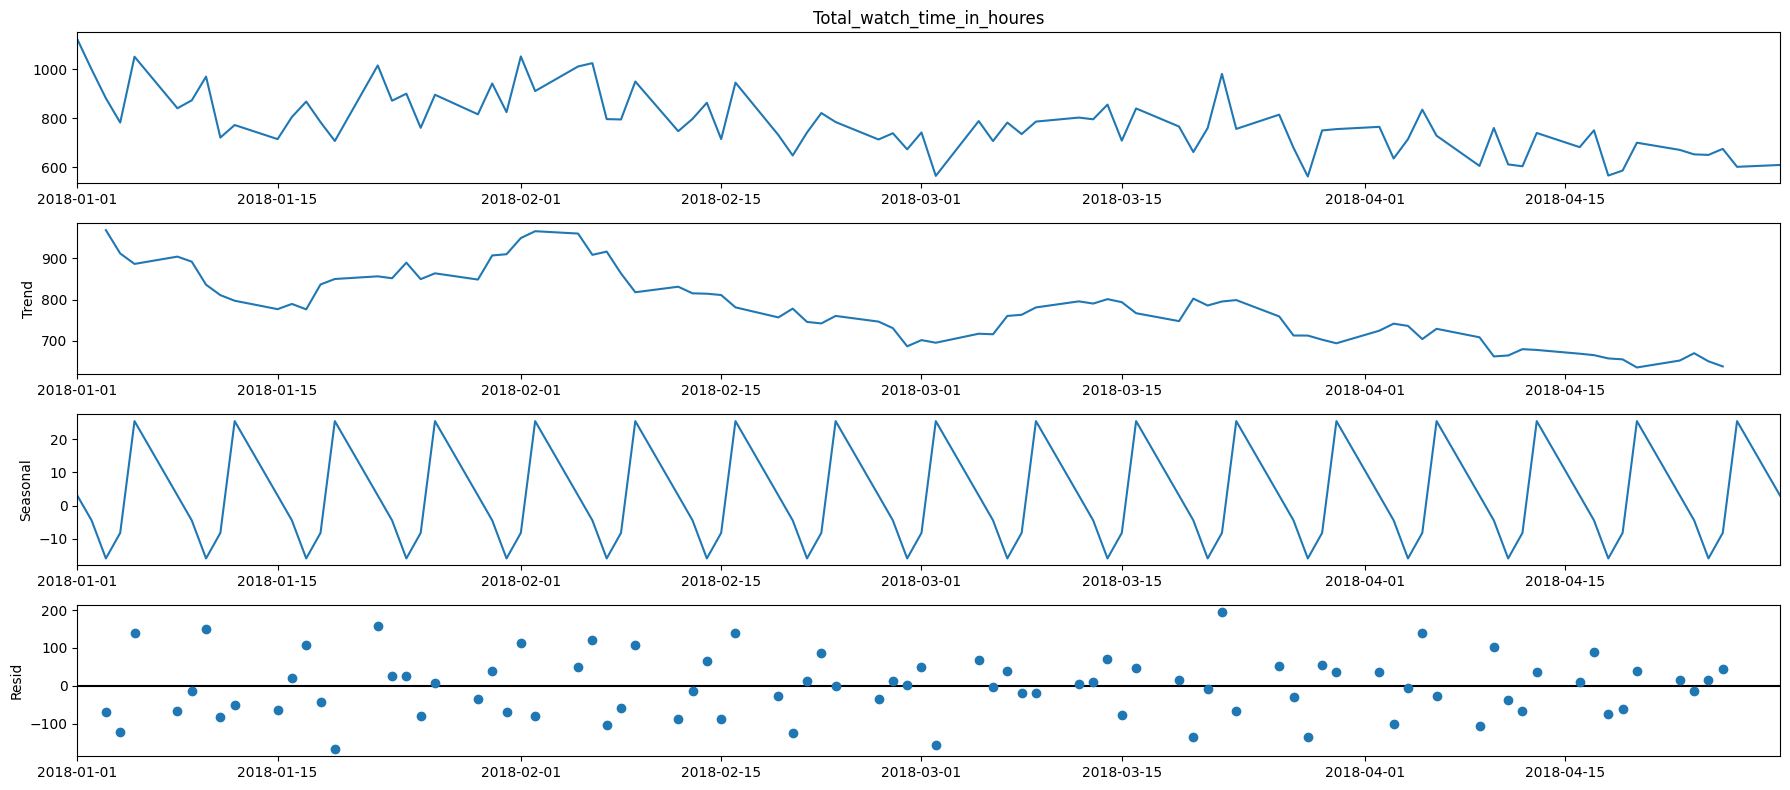

In [43]:
# using the previous dataset build a prediction model to predict the expected watch time for the next two months
y = dataframet2["Total_watch_time_in_houres"]
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [44]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [45]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=True,
                                            enforce_invertibility=False)
            
            results = mod.fit(disp=0)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1393.7197896122402


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so infe

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1322.645008308125
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:958.3625156123426


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:942.0657659770475
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1153.5843935700404


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1138.4941533805595
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:939.2933564975391


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:940.9345100719605
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1303.3183113129858


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1267.077695804916
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:959.4316765909434


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:940.1851703961557


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1151.2466899016117


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1131.2434545010276
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:937.8802530909353


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:939.0125465397299
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1065.2447995635102
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1061.017625021083
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:984.6246941557959


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so infe

ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:944.0813040020494
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1061.896586311819


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1062.9368701350031
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:955.5963068734623


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:942.2167670037807
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1025.4449898259572
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1023.878140117009
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:946.349927448036


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so infe

ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:909.5747650282793
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1023.9957033575744


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1025.8775684837542


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:918.6416712347079


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:908.7386811737963
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1083.1712355278082


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1079.1487965408119
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:958.9709573208679


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:937.5027332060835
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1079.9427175968306


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1081.089524560327
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:936.8309414445262


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:937.29079995506
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1044.0130761214102


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1042.426686396481


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:956.4915051149608


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:924.0706021012645


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1042.5323514570093


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1048.1737321945343


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:930.6851837984348


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:923.1732800498324
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1042.1267220529853
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1041.6800430812


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so infe

ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:956.464737377173


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:924.307723420074
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1042.3883863700128


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1042.7604482920535
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:937.8916043472357


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:925.5633302240078
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1026.9196465356636
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1025.6699066277006


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so infe

ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:946.3835810154476


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:911.3145856366127
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1025.7966752044695


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1027.6654471304373


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:920.3449042845947


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:910.7381314171264


In [46]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results = mod.fit(disp=0)
print(results.summary().tables[1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7956      0.087     -9.121      0.000      -0.967      -0.625
ma.S.L12      -1.0000      0.158     -6.339      0.000      -1.309      -0.691
sigma2      1.002e+04   1.57e-05   6.36e+08      0.000       1e+04       1e+04


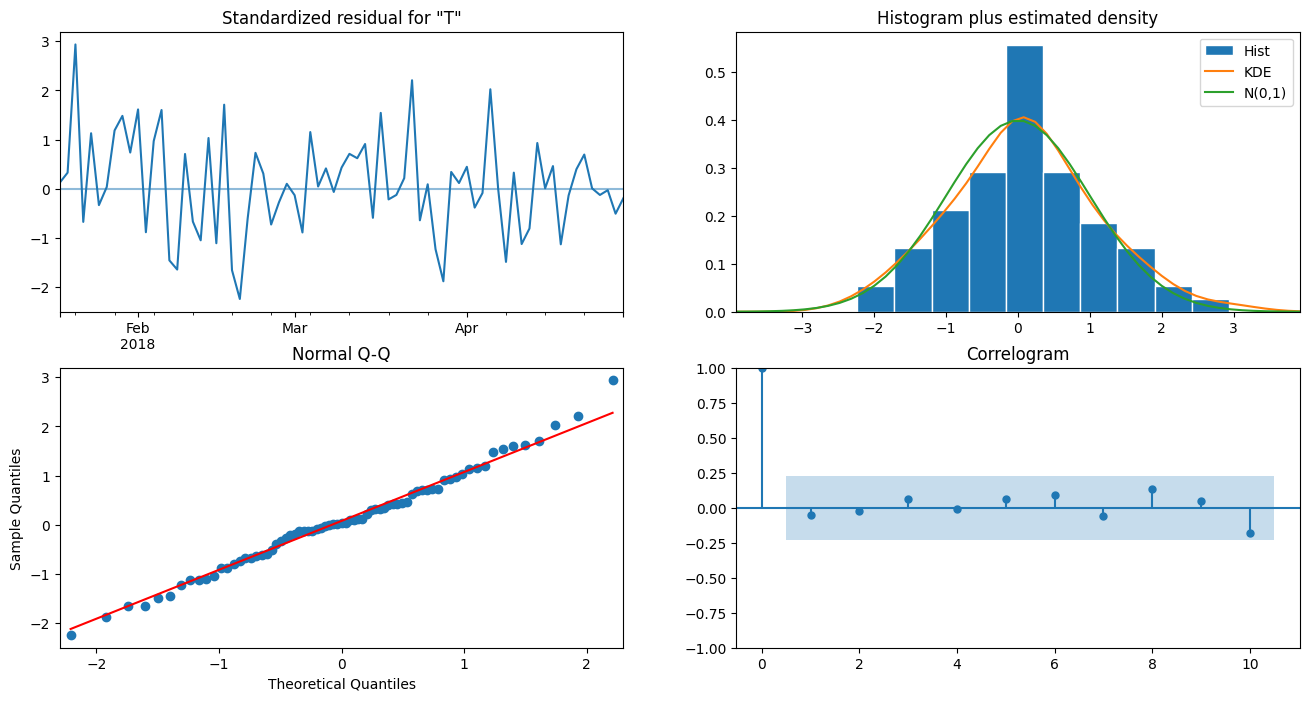

In [47]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

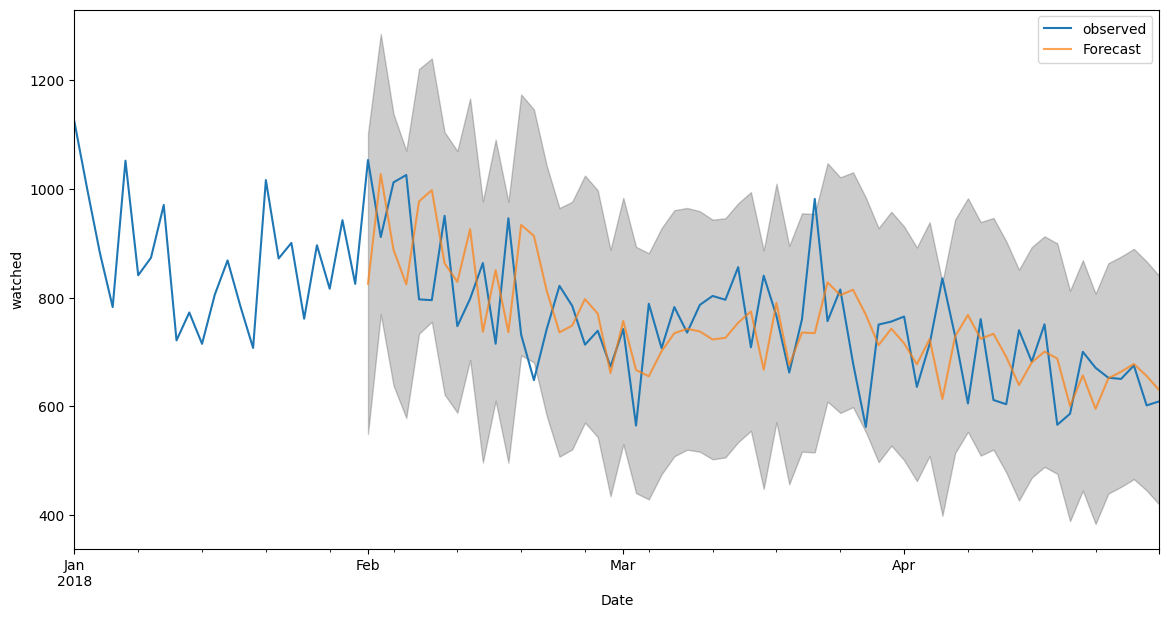

In [48]:
# show the Model out come agianst the actual data
pred = results.get_prediction(start=pd.to_datetime('2018-02-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = dataframet2['Total_watch_time_in_houres'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('watched')
plt.legend()
plt.show()

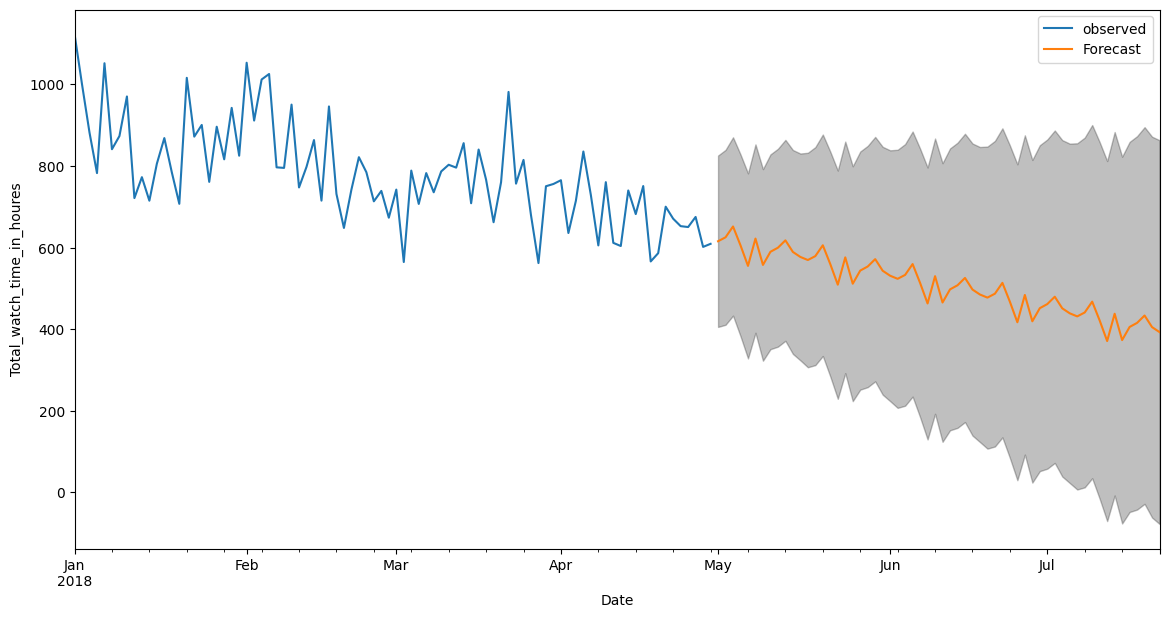

In [49]:
# show forecasts 
pred_uc = results.get_forecast(steps=60)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Total_watch_time_in_houres')
plt.legend()
plt.show()

# Task 3

## Task details
#### After studying the data, use machine learning algorithms for the following: 
#### • First: build a model to provide recommendations to the user based on the views of other users who share the same preferences, to make the viewing experience on stc TV richer and richer.
#### • Second: Show top 5 recommendations for people who watched Moana. 
#### • Third: Once you've finished your hard work, share a sample of the results generated from the code-recommended system on your co-lab.

# Jawwy dataset
The dataset consists of details about each customer and the movies and/or tv shows watched in addition to the genre. 

You are required to work on task three to build a recommendation engine for our platform to Recommend movies to usesrs that they might be interested in¶


In [50]:
url = "/content/drive/MyDrive/source/stc TV Data Set_T3.xlsb" # Replace with the actual URL of the XLSB file

# Read the XLSB file into a DataFrame using pandas
dataframet3 = pd.read_excel(url,index_col=0)

In [51]:
# check the data shape
dataframet3.shape

(1048575, 5)

In [52]:
# display the first 5 rows 
dataframet3.head()

,user_id_maped,program_name,rating,date_,program_genre
0,26138,100 treets,1,2017-05-27,Drama
1,7946,Moana,1,2017-05-21,Animation
2,7418,The Mermaid Princess,1,2017-08-10,Animation
3,19307,The Mermaid Princess,2,2017-07-26,Animation
4,15860,Churchill,2,2017-07-07,Biography


In [54]:
# describe the numeric values in the dataset
dataframet3.describe()

,user_id_maped,rating
count,1.048575e+06,1.048575e+06
mean,1.709266e+04,2.497283e+00
std,1.003513e+04,1.119837e+00
min,1.000000e+00,1.000000e+00
25%,8.253000e+03,1.000000e+00
50%,1.714900e+04,2.000000e+00
75%,2.566500e+04,3.000000e+00
max,3.428000e+04,4.000000e+00


In [55]:
# check if any column has null value in the dataset
dataframet3.isnull().any()

user_id_maped    False
program_name     False
rating           False
date_            False
program_genre    False
dtype: bool

In [56]:
# we import Visualization libraries 
# you can ignore and use any other graphing libraries 
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [58]:
# Pair-wise table for user rating for all movies
movie_features_df=dataframet3.pivot_table(index='program_name',columns='user_id_maped',values='rating').fillna(0)
movie_features_df.head()

user_id_maped,1,5,9,11,15,17,20,26,28,30,...,34259,34261,34263,34265,34267,34269,34271,34273,34277,34280
program_name,,,,,,,,,,,,,,,,,,,,,
#FollowFriday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Days in a Madhouse,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100 treets,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102 Dalmatians,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
movie_features_df_matrix = csr_matrix(movie_features_df.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [61]:
movie_features_df_selection= movie_features_df.reset_index()
movie_features_df_selection[['program_name']]
dataframet3[['program_name']].head(10)

,program_name
0,100 treets
1,Moana
2,The Mermaid Princess
3,The Mermaid Princess
4,Churchill
5,Beavis And Butt-Head Do America
6,The Mermaid Princess
7,Coco
8,Kidnap
9,The Accountant


In [62]:
# show the recommendations (top 5)
program_name='Moana'
recomendations=5

query_index = np.random.choice(movie_features_df.shape[0])
distances, indices = model_knn.kneighbors(movie_features_df.
                     iloc[movie_features_df_selection.index[movie_features_df_selection['program_name'] == program_name].tolist()[0],:].values.reshape(1, -1),
n_neighbors = recomendations+1)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[movie_features_df_selection.index[movie_features_df_selection['program_name'] == program_name].tolist()[0]]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Moana:

1: Trolls, with distance of 0.42764217010640215:
2: Surf's Up : WaveMania, with distance of 0.4705763355181768:
3: The Mermaid Princess, with distance of 0.5066377099343184:
4: The Boss Baby, with distance of 0.551442834662541:
5: The Jetsons & WWE: Robo-WrestleMania!, with distance of 0.5610577907608365:
